In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print("train shape: ", x_train.shape, "train label shape: ", t_train.shape)
print("test shape: ", x_test.shape, "test label: ", t_test.shape)

print("train label: ", t_train) # 학습데이터 정답 출력
print("test label: ", t_test) # 테스트데이터 정답 출력

train shape:  (60000, 28, 28) train label shape:  (60000,)
test shape:  (10000, 28, 28) test label:  (10000,)
train label:  [9 0 0 ... 3 0 5]
test label:  [9 2 1 ... 8 1 5]


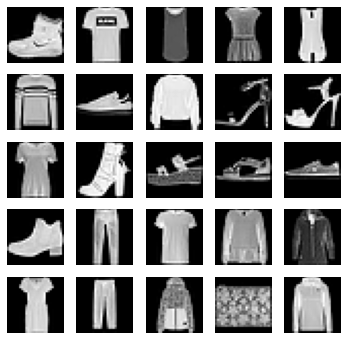

In [2]:
import matplotlib.pyplot as plt

# 25개의 샘플 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):
  plt.subplot(5, 5, index + 1) # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')

plt.show()

In [3]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 원핫 인코딩은 수행하지 않음
# t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
# t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # 입력층
model.add(tf.keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 출력층

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1500/1500 [==============================] - 19s 11ms/step - loss: 0.5248 - accuracy: 0.8183 - val_loss: 0.4514 - val_accuracy: 0.8378
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3997 - accuracy: 0.8590 - val_loss: 0.3786 - val_accuracy: 0.8642
Epoch 3/30
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3589 - accuracy: 0.8704 - val_loss: 0.3774 - val_accuracy: 0.8657
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3321 - accuracy: 0.8778 - val_loss: 0.3575 - val_accuracy: 0.8689
Epoch 5/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3116 - accuracy: 0.8858 - val_loss: 0.3397 - val_accuracy: 0.8782
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2944 - accuracy: 0.8920 - val_loss: 0.3565 - val_accuracy: 0.8723
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2825 - accuracy: 0.8961 - val_loss: 0.3834 - val_accura

In [6]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 0.8863


[0.4068358540534973, 0.8863000273704529]

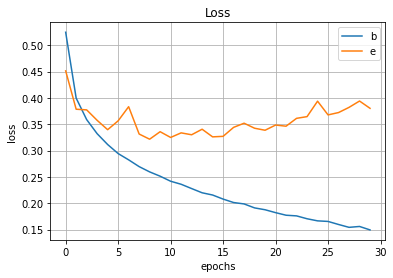

In [7]:
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend('best')

plt.show()

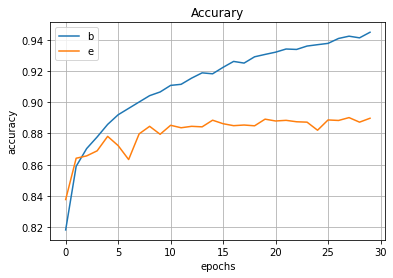

In [8]:
plt.title('Accurary')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.grid()

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend('best')

plt.show()

313/313 [==============================] - 1s 4ms/step


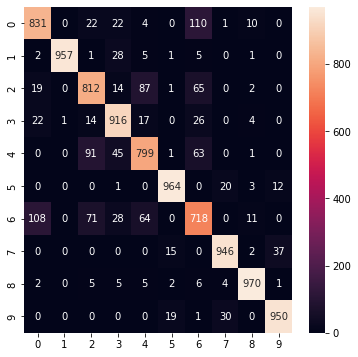

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = model.predict(x_test)
cm = confusion_matrix(t_test, np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()